# Creating a Covid-19 Racing Bar Chart
## For Country Wide Death Rate
### Countries Include: United States, Germany, China, India, Italy, Spain, United Kingdom
##### Data Source :  https://covid.ourworldindata.org/data/ecdc/full_data.csv

In [1]:
# import needed pakcages such as pandas and matplotlib needed for plotting and animation

import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
# import data

covid = pd.read_csv("C:\\Users\\aseal\\Desktop\\Covid Project\\full_data.csv")

In [4]:
# A look at the data structure 
covid.head(5)

date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0

In [5]:
# Data types of variables. Well need to convert 'date' to a pandas datetime object 
covid.dtypes

date            object
location        object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object

In [6]:
# convert date column to datetime object
covid.date = pd.to_datetime(covid.date)

In [7]:
# selecting sub set of countries

countries =  ['United States', 'Germany', 'China', 'India', 'Italy', 'Spain', 'United Kingdom']

covid  = covid[covid.location.isin(countries)]
covid.shape

(783, 6)

In [8]:
# just include feb and april data 

start = '2020-02-01'
end = '2020-04-20'

mask = (covid['date'] >= start) & (covid['date'] <= end)

covid = covid.loc[mask]

In [9]:
# fill missing data with 0
covid = covid.fillna(0)



# calculate death rate as :   totaldeaths(to date) /total cases(to date)
covid['death_rate'] = (covid.total_deaths/covid.total_cases)*100
covid['death_rate'] = round(covid['death_rate'], 2) # round the results to 2 decimal places 

In [10]:
# lets look at our new data frame that includes death rate 
covid.head(5)

date location  new_cases  new_deaths  total_cases  total_deaths  \
2308 2020-02-01    China       2095          46        11809           259   
2309 2020-02-02    China       2590          45        14399           304   
2310 2020-02-03    China       2812          57        17211           361   
2311 2020-02-04    China       3237          65        20448           426   
2312 2020-02-05    China       3872          66        24320           492   

      death_rate  
2308        2.19  
2309        2.11  
2310        2.10  
2311        2.08  
2312        2.02

In [21]:

# set color for each country
colors = dict(zip(
    ['China', 'Spain', 'United States', 'Italy',
     'United Kingdom', 'India', 'Germany'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))


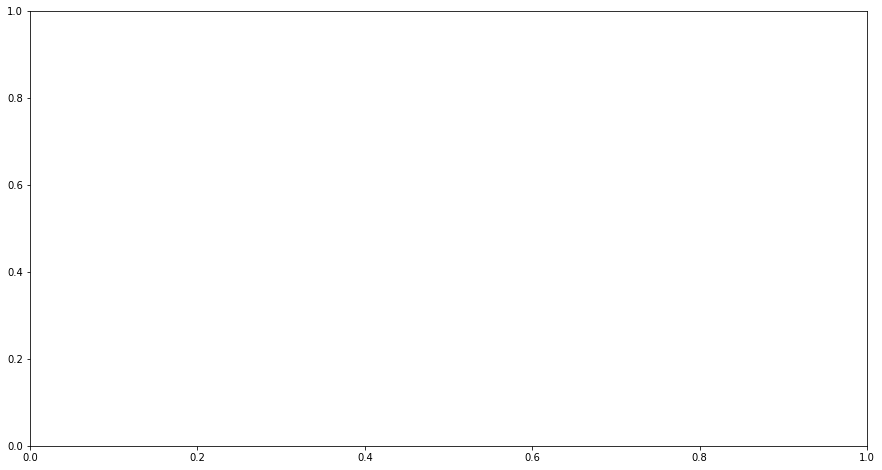

In [19]:
# Here we are defining a function to create a bar chart that includes the countries death rate at
# specific date. It takes one argument(the date of interest)


fig, ax = plt.subplots(figsize=(15, 8))

def race_bar(date):
    df = covid[covid['date'].eq(date)].sort_values(by='death_rate', ascending=True).tail(7)
    
    ax.clear()

    ax.barh(df['location'], df['death_rate'], color= [colors[x] for x in df['location']] )

    for i, (death, local, total_cases) in enumerate(zip(df['death_rate'], df['location'], df['total_cases'])):
        
        num_cases = 'Cases: ' +  str(total_cases)
        death_rate  = str(death) +'%'
    
        ax.text(death/2, i,  local, ha = 'center', size = 14 , va = 'bottom', weight=800)
        
        ax.text(death/2 , i-0.30,  num_cases , ha = 'center', size = 14 , va = 'bottom', weight=500)
    
        ax.text(death, i, death_rate,  ha = 'left', size = 14, va = 'center')
    
    ##################3
    ax.text(1, 0.4, date.date() , transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800) # current date
    ax.text(0, 1.06, 'Percentage % (of Total Cases)', transform=ax.transAxes, size=12, color='#777777') # x axis title
    ax.xaxis.set_major_formatter(ticker.PercentFormatter()) # percent format for x axis ticks
    
    ax.xaxis.set_ticks_position('top') # tick labels at the top
    ax.tick_params(axis='x', colors='#777777', labelsize=12) # size of tick labels
    ax.set_yticks([]) 
    ax.margins(0, 0.01) # margins
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'COVID-19 Death Rate (February-April 20th)',
            transform=ax.transAxes, size=24, weight=600, ha='left') # chart title
    plt.box(False)
    
#race_bar('2020-02-01')


In [13]:
# Create list of dates to pass to our race_bar fuction

dates = covid[covid['location'] == 'China']
dates = list(dates['date'])

#dates = list (set(list(dates)))
#dates

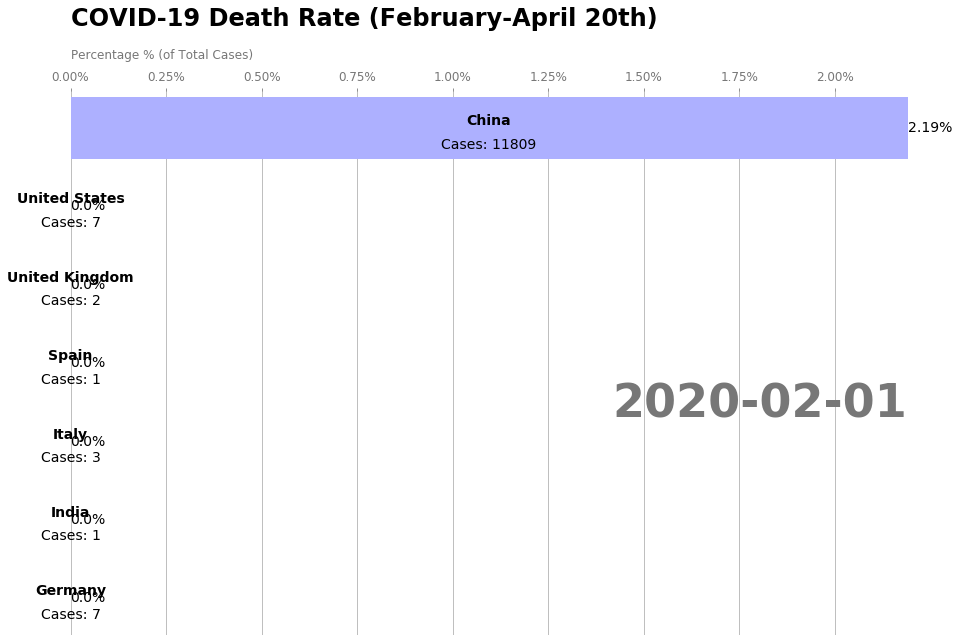

In [22]:
# Now the fun part! Here we create the animation using the list of dates we created 
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 10))
animator = animation.FuncAnimation(fig, race_bar, frames=dates, interval = 300)
HTML(animator.to_jshtml())

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


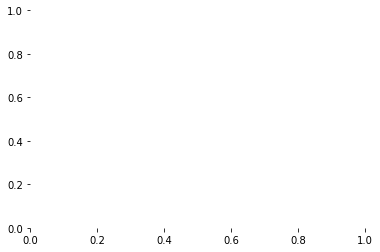

In [23]:
animator.save("C:\\Users\\aseal\\Desktop\\Covid Project\\COVID_Death%.gif")